In [1]:
import DataProvider
prov = DataProvider.DataProvider()

[new value of  10
-new value of  12
--new value of  38
---------------new value of  48
------

/home/rezi/Desktop/Machine Learning/ML_Final_project/DataProvider.py:135: RuntimeWarning: invalid value encountered in true_divide
  spectrogram = (spectrogram - mean) / std


-------new value of  64
---------------------------------------------------new value of  65
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------new value of  72
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------]
[##########################################################################################################################################################################################################################################################################################

In [2]:
import numpy as np
X = list()
y = list()
trainVal = list()

In [3]:
while prov.hasNext(True):
    Xt, yt = prov.next(True)
    for i in range(len(yt)):
        if yt[i] == 1:
            trainVal.append(i+1)
            
    X.append(Xt)
    y.append(yt)

In [4]:
X = np.nan_to_num(np.matrix(X))
y = np.matrix(y)

X.shape, y.shape

((688, 1440), (688, 5))

In [5]:
X2 = list()
y2 = list()
actualVal = list()

In [6]:
while prov.hasNext(False):
    X2t, y2t = prov.next(False)
    actualVal.append(y2t)
    
    k = np.zeros(5)
    k[y2t - 1] = 1
    
    X2.append(X2t)
    y2.append(k)

In [7]:
X2 = np.nan_to_num(np.matrix(X2))
y2 = np.matrix(y2)

X2.shape, y2.shape

((27, 1440), (27, 5))

In [420]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers

In [421]:
model = Sequential()
sgd = optimizers.SGD(lr=0.005, decay=1e-6, momentum=0.9, nesterov=True)

In [422]:
model.add(Dense(units=32, activation='relu', input_dim = prov.returnSizeOfEverySpectogram()))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
#model.add(Dense(32))
model.add(Dense(units=5, activation='softmax'))

In [423]:
model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

In [424]:
history = model.fit(X, y, epochs=25, batch_size=128, validation_split=0.2, verbose=1)
#model.train_on_batch(X, y)

Train on 550 samples, validate on 138 samples
Epoch 1/25
550/550 [==============================] - 0s 241us/step - loss: 1.6112 - accuracy: 0.2055 - val_loss: 1.6187 - val_accuracy: 0.2174
Epoch 2/25
550/550 [==============================] - 0s 30us/step - loss: 1.6007 - accuracy: 0.2236 - val_loss: 1.6159 - val_accuracy: 0.2029
Epoch 3/25
550/550 [==============================] - 0s 64us/step - loss: 1.5861 - accuracy: 0.2618 - val_loss: 1.6123 - val_accuracy: 0.2029
Epoch 4/25
550/550 [==============================] - 0s 69us/step - loss: 1.5693 - accuracy: 0.3091 - val_loss: 1.6082 - val_accuracy: 0.2101
Epoch 5/25
550/550 [==============================] - 0s 66us/step - loss: 1.5511 - accuracy: 0.3818 - val_loss: 1.6031 - val_accuracy: 0.2101
Epoch 6/25
550/550 [==============================] - 0s 70us/step - loss: 1.5316 - accuracy: 0.4327 - val_loss: 1.5965 - val_accuracy: 0.1884
Epoch 7/25
550/550 [==============================] - 0s 68us/step - loss: 1.5108 - accuracy: 0

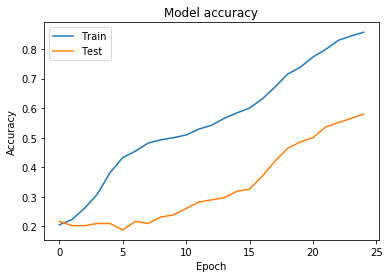

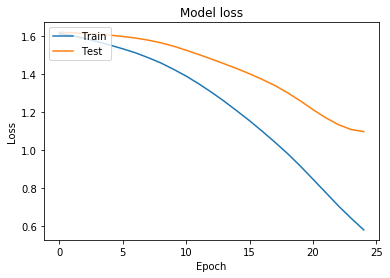

In [425]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [426]:
loss_and_metrics = model.evaluate(X2, y2, batch_size=512)

27/27 [==============================] - 0s 93us/step


In [427]:
pred = model.predict(X2, batch_size=128)

In [428]:
pr = np.argmax(pred, axis=1)+1
pr

array([4, 5, 5, 5, 4, 5, 5, 1, 5, 2, 4, 3, 5, 5, 5, 3, 1, 5, 3, 5, 4, 3,
       5, 5, 2, 5, 1])

In [429]:
correct = [1 if a == b else 0 for (a, b) in zip(pr, actualVal)]
accuracy = (sum(map(int, correct)) / float(len(correct)))
print ("Accuracy: " + str(accuracy * 100) + "%")

Accuracy: 59.25925925925925%


In [430]:
for i in pred:
    count = sum(i)
    for j in range(len(i)):
        i[j] = i[j] / count

In [431]:
import copy
countGrade = copy.deepcopy(actualVal)


In [432]:
for i in range(len(countGrade)):
    ans = actualVal[i]
    countGrade[i] = pred[i][ans-1]

In [433]:
result = sum(countGrade) / len(countGrade)
result

0.40369327559515283

In [434]:
model.summary()

Model: "sequential_28"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_132 (Dense)            (None, 32)                46112     
_________________________________________________________________
dense_133 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_134 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_135 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_136 (Dense)            (None, 5)                 165       
Total params: 49,445
Trainable params: 49,445
Non-trainable params: 0
_________________________________________________________________
